In [2]:
# Yield prediction 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [5]:
# define custom function to extract strings and perform lookup
def get_yield(entry):
    range_ = entry.replace(".jpg","")[13:-2].split("_")[0]
    pass_ = entry.replace(".jpg","")[13:-2].split("_")[1]
    gene_ = entry.replace(".jpg","")[8:12]
    
#     range_ = entry.replace(".TIF","")[13:].split("_")[0]
#     pass_ = entry.replace(".TIF","")[13:].split("_")[1]
#     gene_ = entry.replace(".TIF","")[8:12]

    yield_ = df2.loc[(df2['Range'] == int(range_)) & (df2['Pass'] == int(pass_)) & (df2['Exp'] == "LC_"+gene_), 'Yield (bu/ac)'].values
    if len(yield_) == 1:
        return yield_[0]
    else:
        return None

In [3]:
#################template#########################

In [6]:
# define custom function to extract strings and perform lookup
def get_yield(entry):
    range_ = entry.replace(".jpg","")[13:-2].split("_")[0]
    pass_ = entry.replace(".jpg","")[13:-2].split("_")[1]
    gene_ = entry.replace(".jpg","")[8:12]
    
#     range_ = entry.replace(".TIF","")[13:].split("_")[0]
#     pass_ = entry.replace(".TIF","")[13:].split("_")[1]
#     gene_ = entry.replace(".TIF","")[8:12]

    yield_ = df2.loc[(df2['Range'] == int(range_)) & (df2['Pass'] == int(pass_)) & (df2['Exp'] == "LC_"+gene_), 'Yield (bu/ac)'].values
    if len(yield_) == 1:
        return yield_[0]
    else:
        return None
    
dfq = pd.read_csv("satin.csv")
# assuming df is the pandas dataframe that you want to modify
# dfq = dfq.fillna(255)
# print(dfq)
x0 = dfq.iloc[:, :1]
x1 = dfq.iloc[:, 1:]

scaler = StandardScaler()
scaler.fit(x1)
x1_scaled = scaler.transform(x1)

pca_1000 = PCA(n_components=0.95,random_state=100)
pca_1000.fit(x1_scaled)
x1_pca_1000 =pca_1000.transform(x1_scaled)

print("variance explained", sum(pca_1000.explained_variance_ratio_*100))


df_new =pd.DataFrame(x1_pca_1000, columns=["PCA"+str(x) for x in range(x1_pca_1000.shape[1])])

merged_df = pd.concat([x0, df_new], axis=1)

df1 = merged_df
df2 = pd.read_excel("YTMC_ Lisa_Plot_Coordinates_v4.xlsx", sheet_name="RawData (4-Row)")

# add new column to df1 using apply() and get_yield() function
df1['Yield'] = df1['filename'].apply(get_yield)



# df1 = df1.dropna()

# to_drop = ~df1['filename'].str.contains('-W3-')

# # drop the selected rows using the df.drop() method
# df1 = df1.drop(df1[to_drop].index)

# df1.to_csv("small.csv",index=false)

# X = df1.drop(columns=['Yield']).drop(columns=['filename'])
# y = df1[['Yield']]
# print(X.shape)
# X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)



# # #Linera Reg
# # print("=================+++++++++++++++++Linear Regrssion+++++++++++++++++++====================++++++++++++")
# # reg = LinearRegression()
# # reg.fit(X_train, y_train)
# # pred_linear = reg.predict(X_test)


# # mae_linear = mean_absolute_error(y_test, pred_linear)
# # mse_linear = mean_squared_error(y_test, pred_linear)
# # rmse_linear = np.sqrt(mse_linear)
# # rsq_linear = r2_score(y_test, pred_linear)

# # print('MAE: %.3f' % mae_linear)
# # print('MSE: %.3f' % mse_linear)
# # print('RMSE: %.3f' % rmse_linear)
# # print('R-Square: %.3f' % rsq_linear)
# # print("=================++++++++++++++++++++++++++++++++++++====================++++++++++++)")
# # print("")
# # print("=================+++++++++++++++++RandomForestRegressor+++++++++++++++++++====================++++++++++++)")

# # # Defining the model and stating the random state to 1
# # rf_model = RandomForestRegressor()#(random_state=1)

# # # fitting the model
# # rf_model.fit(X_train, y_train)
# # pred_rf=rf_model.predict(X_test)
# # pred_rf=pred_rf.reshape(105,1)

# # mae_rf = mean_absolute_error(y_test, pred_rf)
# # mse_rf = mean_squared_error(y_test, pred_rf)
# # rmse_rf = np.sqrt(mse_rf)
# # rsq_rf = r2_score(y_test, pred_rf)

# # print('MAE: %.3f' % mae_rf)
# # print('MSE: %.3f' % mse_rf)
# # print('RMSE: %.3f' % rmse_rf)
# # print('R-Square: %.3f' % rsq_rf)
# # print("=================++++++++++++++++++++++++++++++++++++====================++++++++++++)")
# # print("")
# # print("=================+++++++++++++++++DecisionTreeRegressor+++++++++++++++++++====================++++++++++++)")
# # dtree_reg = DecisionTreeRegressor()
# # dtree_reg.fit(X_train, y_train)
# # pred_dtree = dtree_reg.predict(X_test)

# # mae_dtree = mean_absolute_error(y_test, pred_dtree)
# # mse_dtree = mean_squared_error(y_test, pred_dtree)
# # rmse_dtree = np.sqrt(mse_dtree)
# # rsq_dtree = r2_score(y_test, pred_dtree)

# # print('MAE: %.3f' % mae_dtree)
# # print('MSE: %.3f' % mse_dtree)
# # print('RMSE: %.3f' % rmse_dtree)
# # print('R-Square: %.3f' % rsq_dtree)


# # print("=================++++++++++++++++++++++++++++++++++++====================++++++++++++)")
# # print("")
# # print("=================+++++++++++++++++XGBRegressor+++++++++++++++++++====================++++++++++++)")
# # xgb_model = XGBRegressor()
# # xgb_model.fit(X_train, y_train)
# # pred_xgb = xgb_model.predict(X_test) 

# # mae_xgb = mean_absolute_error(y_test, pred_xgb)
# # mse_xgb = mean_squared_error(y_test, pred_xgb)
# # rmse_xgb = np.sqrt(mse_xgb)
# # rsq_xgb = r2_score(y_test, pred_xgb)

# # print('MAE: %.3f' % mae_xgb)
# # print('MSE: %.3f' % mse_xgb)
# # print('RMSE: %.3f' % rmse_xgb)
# # print('R-Square: %.3f' % rsq_xgb)


# # error_rec = {
# #     "linearreg": {
# #         "mae": mae_linear,
# #         "rmse": rmse_linear,
# #         'r2': rsq_linear*100
# #     },
# #     "randomforest": {
# #         "mae": mae_rf,
# #         "rmse": rmse_rf,
# #         'r2': rsq_rf*100
# #     },
# #     "decisiontree": {
# #         "mae": mae_dtree,
# #         "rmse": rmse_dtree,
# #         'r2': rsq_dtree*100
# #     },
# #     "xgboost": {
# #         "mae": mae_xgb,
# #         "rmse": rmse_xgb,
# #         'r2': rsq_xgb*100
# #     },
# # }
# # pd.DataFrame(error_rec).plot(kind="bar", 
# #              color=[
# #                  sns.color_palette("pastel")[1], 
# #                  sns.color_palette("pastel")[2], 
# #                  sns.color_palette("pastel")[3], 
# #                  sns.color_palette("pastel")[4]]);


# # Create the models
# reg = LinearRegression()
# rf_model = RandomForestRegressor(random_state=42)
# dtree_reg = DecisionTreeRegressor(random_state=42)
# xgb_model = XGBRegressor(random_state=42)

# # Create a list of the models and their names
# models = [("Linear Regression", reg),
#           ("Random Forest Regressor", rf_model),
#           ("Decision Tree Regressor", dtree_reg),
#           ("XGB Regressor", xgb_model)]

# # Loop through each model and print the K-fold cross-validation results
# for name, model in models:
#     # Calculate K-fold cross-validation results
#     scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
#     # Convert negative mean squared error to root mean squared error
#     rmse_scores = np.sqrt(-scores)
#     # Print the results
#     print(f"{name}: RMSE: {rmse_scores.mean():.3f} +/- {rmse_scores.std():.3f}")


variance explained 95.0488729361092


In [7]:
df1['filename']

0       Ames-W3-4232_23_17W3.jpg
1       Ames-W2-4232_25_21W2.jpg
2       Ames-W1-4232_17_22W1.jpg
3        Ames-W2-4233_15_2W2.jpg
4        Ames-W2-4233_10_1W2.jpg
                  ...           
2011      Ames-W1-4233_5_9W1.jpg
2012      Ames-W3-4233_7_8W3.jpg
2013     Ames-W2-4232_8_20W2.jpg
2014    Ames-W2-4232_21_20W2.jpg
2015    Ames-W2-4232_30_19W2.jpg
Name: filename, Length: 2016, dtype: object

In [5]:
for csv_ in ["noresize_uavin.csv"]:#"noresize_satin.csv",

    dfq = pd.read_csv(csv_)
    dfq.fillna(255, inplace=True)
    print(dfq.shape)
    x0 = dfq.iloc[:, :1]
    x1 = dfq.iloc[:, 1:]

    scaler = StandardScaler()
    scaler.fit(x1)
    x1_scaled = scaler.transform(x1)

    pca_1000 = PCA(n_components=0.95,random_state=100)
    pca_1000.fit(x1_scaled)
    x1_pca_1000 =pca_1000.transform(x1_scaled)

    print("variance explained", sum(pca_1000.explained_variance_ratio_*100))

    df_new =pd.DataFrame(x1_pca_1000, columns=["PCA"+str(x) for x in range(x1_pca_1000.shape[1])])

    merged_df = pd.concat([x0, df_new], axis=1)

    df1 = merged_df
    df2 = pd.read_excel("YTMC_ Lisa_Plot_Coordinates_v4.xlsx", sheet_name="RawData (4-Row)")

    # add new column to df1 using apply() and get_yield() function
    df1['Yield'] = df1['filename'].apply(get_yield)



    df1 = df1.dropna()

    to_drop = ~df1['filename'].str.contains('-W3-')

    # drop the selected rows using the df.drop() method
    df1 = df1.drop(df1[to_drop].index)
    
    
    df1.to_csv("small"+csv_, index=False)

(672, 860647)
variance explained 95.03180620356702


In [6]:
for csv_ in ["smallnoresize_satin.csv","smallnoresize_uavin.csv"]:   
    df1 = pd.read_csv(csv_)
    X = df1.drop(columns=['Yield']).drop(columns=['filename'])
    y = df1[['Yield']]

    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)



    # Create the models
    reg = LinearRegression()
    rf_model = RandomForestRegressor(random_state=42)
    dtree_reg = DecisionTreeRegressor(random_state=42)
    xgb_model = XGBRegressor(random_state=42)

    # Create a list of the models and their names
    models = [("Linear Regression", reg),
              ("Random Forest Regressor", rf_model),
              ("Decision Tree Regressor", dtree_reg),
              ("XGB Regressor", xgb_model)]

    # Loop through each model and print the K-fold cross-validation results
    for name, model in models:
        # Calculate K-fold cross-validation results
        scores = cross_val_score(model, X, y.values.ravel(), cv=5, scoring='neg_mean_squared_error')
        # Convert negative mean squared error to root mean squared error
        rmse_scores = np.sqrt(-scores)
        # Print the results
        mae_scores = cross_val_score(model, X, y.values.ravel(), cv=5, scoring='neg_mean_absolute_error')
        r2_scores = cross_val_score(model, X, y.values.ravel(), cv=5, scoring='r2')
        # Print the results
        print(f"{name}: RMSE: {rmse_scores.mean():.3f} +/- {rmse_scores.std():.3f} | MAE: {np.abs(mae_scores.mean()):.3f} +/- {mae_scores.std():.3f} | R^2: {r2_scores.mean():.3f} +/- {r2_scores.std():.3f}")
        
        
    print("************************************DONE*************************************")


Linear Regression: RMSE: 22.741 +/- 1.439 | MAE: 17.679 +/- 0.782 | R^2: 0.459 +/- 0.047
Random Forest Regressor: RMSE: 21.912 +/- 0.971 | MAE: 17.306 +/- 0.611 | R^2: 0.495 +/- 0.058
Decision Tree Regressor: RMSE: 31.317 +/- 2.307 | MAE: 24.963 +/- 2.184 | R^2: -0.039 +/- 0.189
XGB Regressor: RMSE: 23.441 +/- 2.028 | MAE: 18.179 +/- 1.518 | R^2: 0.417 +/- 0.109
************************************DONE*************************************
Linear Regression: RMSE: 46.466 +/- 3.052 | MAE: 36.515 +/- 2.437 | R^2: -1.288 +/- 0.299
Random Forest Regressor: RMSE: 24.418 +/- 1.504 | MAE: 19.156 +/- 1.268 | R^2: 0.371 +/- 0.057
Decision Tree Regressor: RMSE: 35.511 +/- 2.023 | MAE: 27.719 +/- 1.986 | R^2: -0.329 +/- 0.095
XGB Regressor: RMSE: 25.862 +/- 1.331 | MAE: 20.587 +/- 1.122 | R^2: 0.294 +/- 0.061
************************************DONE*************************************


In [26]:
for csv_ in ["smallsatin.csv","smalluavin.csv","smalluavgen.csv"]:    
    df1 = pd.read_csv(csv_)
    X = df1.drop(columns=['Yield']).drop(columns=['filename'])
    y = df1[['Yield']]

    X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)



    # Create the models
    reg = LinearRegression()
    rf_model = RandomForestRegressor(random_state=42)
    dtree_reg = DecisionTreeRegressor(random_state=42)
    xgb_model = XGBRegressor(random_state=42)

    # Create a list of the models and their names
    models = [("Linear Regression", reg),
              ("Random Forest Regressor", rf_model),
              ("Decision Tree Regressor", dtree_reg),
              ("XGB Regressor", xgb_model)]

    # Loop through each model and print the K-fold cross-validation results
    for name, model in models:
        # Calculate K-fold cross-validation results
        scores = cross_val_score(model, X, y.values.ravel(), cv=5, scoring='neg_mean_squared_error')
        # Convert negative mean squared error to root mean squared error
        rmse_scores = np.sqrt(-scores)
        # Print the results
        mae_scores = cross_val_score(model, X, y.values.ravel(), cv=5, scoring='neg_mean_absolute_error')
        r2_scores = cross_val_score(model, X, y.values.ravel(), cv=5, scoring='r2')
        # Print the results
        print(f"{name}: RMSE: {rmse_scores.mean():.3f} +/- {rmse_scores.std():.3f} | MAE: {np.abs(mae_scores.mean()):.3f} +/- {mae_scores.std():.3f} | R^2: {r2_scores.mean():.3f} +/- {r2_scores.std():.3f}")
        
        
    print("************************************DONE*************************************")


Linear Regression: RMSE: 24.405 +/- 1.628 | MAE: 18.985 +/- 1.643 | R^2: 0.370 +/- 0.079
Random Forest Regressor: RMSE: 22.049 +/- 1.816 | MAE: 17.318 +/- 1.400 | R^2: 0.485 +/- 0.077
Decision Tree Regressor: RMSE: 30.193 +/- 1.639 | MAE: 23.633 +/- 1.695 | R^2: 0.036 +/- 0.110
XGB Regressor: RMSE: 23.779 +/- 2.224 | MAE: 18.056 +/- 1.658 | R^2: 0.398 +/- 0.115
************************************DONE*************************************
Linear Regression: RMSE: 26.848 +/- 1.643 | MAE: 21.144 +/- 1.295 | R^2: 0.233 +/- 0.108
Random Forest Regressor: RMSE: 24.427 +/- 1.383 | MAE: 19.374 +/- 1.127 | R^2: 0.367 +/- 0.075
Decision Tree Regressor: RMSE: 33.112 +/- 1.737 | MAE: 26.173 +/- 1.686 | R^2: -0.175 +/- 0.213
XGB Regressor: RMSE: 25.822 +/- 1.743 | MAE: 20.421 +/- 1.322 | R^2: 0.290 +/- 0.106
************************************DONE*************************************
Linear Regression: RMSE: 22.772 +/- 1.218 | MAE: 17.868 +/- 1.107 | R^2: 0.456 +/- 0.028
Random Forest Regressor: R

In [ ]:
# SAT No_resizing ---- UAV No_resizing

# Linear Regression: RMSE: 22.741 +/- 1.439 | MAE: 17.679 +/- 0.782 | R^2: 0.459 +/- 0.047
# Random Forest Regressor: RMSE: 21.912 +/- 0.971 | MAE: 17.306 +/- 0.611 | R^2: 0.495 +/- 0.058
# Decision Tree Regressor: RMSE: 31.317 +/- 2.307 | MAE: 24.963 +/- 2.184 | R^2: -0.039 +/- 0.189
# XGB Regressor: RMSE: 23.441 +/- 2.028 | MAE: 18.179 +/- 1.518 | R^2: 0.417 +/- 0.109
# ************************************DONE*************************************
# Linear Regression: RMSE: 46.466 +/- 3.052 | MAE: 36.515 +/- 2.437 | R^2: -1.288 +/- 0.299
# Random Forest Regressor: RMSE: 24.418 +/- 1.504 | MAE: 19.156 +/- 1.268 | R^2: 0.371 +/- 0.057
# Decision Tree Regressor: RMSE: 35.511 +/- 2.023 | MAE: 27.719 +/- 1.986 | R^2: -0.329 +/- 0.095
# XGB Regressor: RMSE: 25.862 +/- 1.331 | MAE: 20.587 +/- 1.122 | R^2: 0.294 +/- 0.061
# ************************************DONE*************************************



# Sat resize - UAV Resize - UAV Gen

# Linear Regression: RMSE: 24.405 +/- 1.628 | MAE: 18.985 +/- 1.643 | R^2: 0.370 +/- 0.079
# Random Forest Regressor: RMSE: 22.049 +/- 1.816 | MAE: 17.318 +/- 1.400 | R^2: 0.485 +/- 0.077
# Decision Tree Regressor: RMSE: 30.193 +/- 1.639 | MAE: 23.633 +/- 1.695 | R^2: 0.036 +/- 0.110
# XGB Regressor: RMSE: 23.779 +/- 2.224 | MAE: 18.056 +/- 1.658 | R^2: 0.398 +/- 0.115
# ************************************DONE*************************************
# Linear Regression: RMSE: 26.848 +/- 1.643 | MAE: 21.144 +/- 1.295 | R^2: 0.233 +/- 0.108
# Random Forest Regressor: RMSE: 24.427 +/- 1.383 | MAE: 19.374 +/- 1.127 | R^2: 0.367 +/- 0.075
# Decision Tree Regressor: RMSE: 33.112 +/- 1.737 | MAE: 26.173 +/- 1.686 | R^2: -0.175 +/- 0.213
# XGB Regressor: RMSE: 25.822 +/- 1.743 | MAE: 20.421 +/- 1.322 | R^2: 0.290 +/- 0.106
# ************************************DONE*************************************
# Linear Regression: RMSE: 22.772 +/- 1.218 | MAE: 17.868 +/- 1.107 | R^2: 0.456 +/- 0.028
# Random Forest Regressor: RMSE: 23.209 +/- 1.858 | MAE: 18.335 +/- 1.293 | R^2: 0.433 +/- 0.073
# Decision Tree Regressor: RMSE: 34.869 +/- 3.456 | MAE: 27.406 +/- 2.702 | R^2: -0.287 +/- 0.249
# XGB Regressor: RMSE: 24.882 +/- 2.303 | MAE: 19.384 +/- 1.931 | R^2: 0.344 +/- 0.124
# ************************************DONE*************************************

In [27]:
d = {}
d["Model"] = ["linear_regression", "random forest","decision trees","xgboost"]
d["UAV GT"] = ['26.848 +/- 1.643', '24.427 +/- 1.383', '33.112 +/- 1.737', '25.822 +/- 1.743']
d["Sat GT"] = ['24.405 +/- 1.628','22.049 +/- 1.816', '30.193 +/- 1.639', '23.779 +/- 2.224']
d["UAV Gen"] = ['22.772 +/- 1.218','23.209 +/- 1.858','34.869 +/- 3.456','24.882 +/- 2.303']


df = pd.DataFrame(d)

print("RMSE for 5-fold validation, PCA n_components 0.95")
df

RMSE for 5-fold validation, PCA n_components 0.95


,Model,UAV GT,Sat GT,UAV Gen
0,linear_regression,26.848 +/- 1.643,24.405 +/- 1.628,22.772 +/- 1.218
1,random forest,24.427 +/- 1.383,22.049 +/- 1.816,23.209 +/- 1.858
2,decision trees,33.112 +/- 1.737,30.193 +/- 1.639,34.869 +/- 3.456
3,xgboost,25.822 +/- 1.743,23.779 +/- 2.224,24.882 +/- 2.303


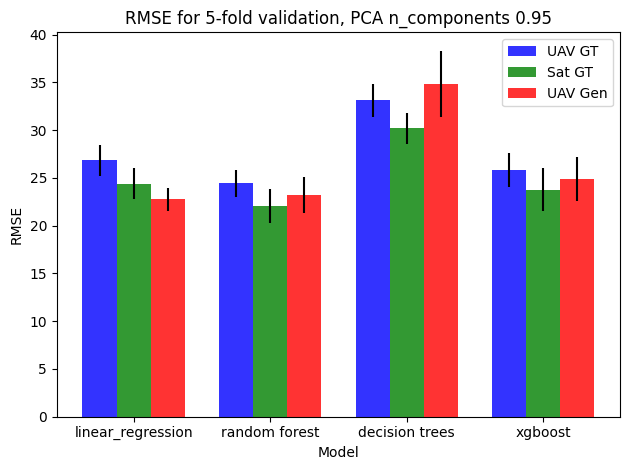

In [28]:
import matplotlib.pyplot as plt

# Define the data to plot
model_names = df["Model"]
uav_gt_means = [float(x.split()[0]) for x in df["UAV GT"]]
uav_gt_std = [float(x.split()[2].strip()) for x in df["UAV GT"]]
sat_gt_means = [float(x.split()[0]) for x in df["Sat GT"]]
sat_gt_std = [float(x.split()[2].strip()) for x in df["Sat GT"]]
uav_gen_means = [float(x.split()[0]) for x in df["UAV Gen"]]
uav_gen_std = [float(x.split()[2].strip()) for x in df["UAV Gen"]]

# Set up the plot
fig, ax = plt.subplots()
bar_width = 0.25
opacity = 0.8

# Plot the data
rects1 = ax.bar(range(len(model_names)), uav_gt_means, bar_width,
                alpha=opacity, color='b', label='UAV GT', yerr=uav_gt_std)
rects2 = ax.bar([x + bar_width for x in range(len(model_names))], sat_gt_means, bar_width,
                alpha=opacity, color='g', label='Sat GT', yerr=sat_gt_std)
rects3 = ax.bar([x + bar_width*2 for x in range(len(model_names))], uav_gen_means, bar_width,
                alpha=opacity, color='r', label='UAV Gen', yerr=uav_gen_std)

# Add labels, title, and legend
ax.set_xlabel('Model')
ax.set_ylabel('RMSE')
ax.set_title('RMSE for 5-fold validation, PCA n_components 0.95')
ax.set_xticks([x + bar_width for x in range(len(model_names))])
ax.set_xticklabels(model_names)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [29]:
d = {}
d["Model"] = ["linear_regression", "random forest","decision trees","xgboost"]
d["UAV GT"] = ['21.144 +/- 1.295', '19.374 +/- 1.127', '26.173 +/- 1.686', '20.421 +/- 1.322']
d["Sat GT"] = ['18.985 +/- 1.643','17.318 +/- 1.400', '23.633 +/- 1.695', '18.056 +/- 1.658']
d["UAV Gen"] = ['17.868 +/- 1.107','18.335 +/- 1.293','27.406 +/- 2.702','19.384 +/- 1.931']


df = pd.DataFrame(d)

print("MAE for 5-fold validation, PCA n_components 0.95")
df

MAE for 5-fold validation, PCA n_components 0.95


,Model,UAV GT,Sat GT,UAV Gen
0,linear_regression,21.144 +/- 1.295,18.985 +/- 1.643,17.868 +/- 1.107
1,random forest,19.374 +/- 1.127,17.318 +/- 1.400,18.335 +/- 1.293
2,decision trees,26.173 +/- 1.686,23.633 +/- 1.695,27.406 +/- 2.702
3,xgboost,20.421 +/- 1.322,18.056 +/- 1.658,19.384 +/- 1.931


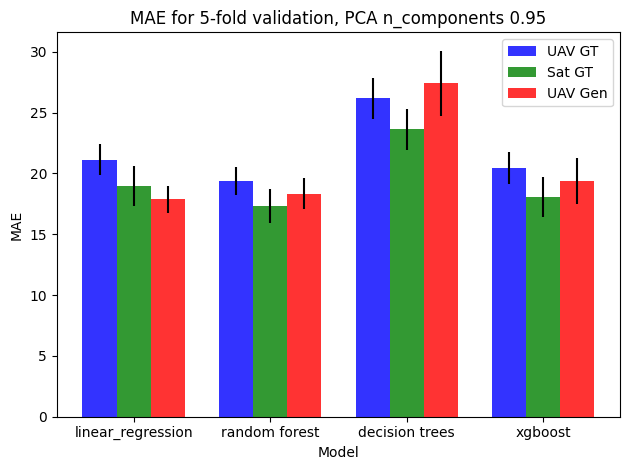

In [30]:
import matplotlib.pyplot as plt

# Define the data to plot
model_names = df["Model"]
uav_gt_means = [float(x.split()[0]) for x in df["UAV GT"]]
uav_gt_std = [float(x.split()[2].strip()) for x in df["UAV GT"]]
sat_gt_means = [float(x.split()[0]) for x in df["Sat GT"]]
sat_gt_std = [float(x.split()[2].strip()) for x in df["Sat GT"]]
uav_gen_means = [float(x.split()[0]) for x in df["UAV Gen"]]
uav_gen_std = [float(x.split()[2].strip()) for x in df["UAV Gen"]]

# Set up the plot
fig, ax = plt.subplots()
bar_width = 0.25
opacity = 0.8

# Plot the data
rects1 = ax.bar(range(len(model_names)), uav_gt_means, bar_width,
                alpha=opacity, color='b', label='UAV GT', yerr=uav_gt_std)
rects2 = ax.bar([x + bar_width for x in range(len(model_names))], sat_gt_means, bar_width,
                alpha=opacity, color='g', label='Sat GT', yerr=sat_gt_std)
rects3 = ax.bar([x + bar_width*2 for x in range(len(model_names))], uav_gen_means, bar_width,
                alpha=opacity, color='r', label='UAV Gen', yerr=uav_gen_std)

# Add labels, title, and legend
ax.set_xlabel('Model')
ax.set_ylabel('MAE')
ax.set_title('MAE for 5-fold validation, PCA n_components 0.95')
ax.set_xticks([x + bar_width for x in range(len(model_names))])
ax.set_xticklabels(model_names)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [31]:
d = {}
d["Model"] = ["linear_regression", "random forest","decision trees","xgboost"]
d["UAV GT"] = ['0.233 +/- 0.108', '0.367 +/- 0.075', '-0.175 +/- 0.213', '0.290 +/- 0.106']
d["Sat GT"] = ['0.370 +/- 0.079','0.485 +/- 0.077', '0.036 +/- 0.110', '0.398 +/- 0.115']
d["UAV Gen"] = ['0.456 +/- 0.028','0.433 +/- 0.073','-0.287 +/- 0.249','0.344 +/- 0.124']


df = pd.DataFrame(d)

print("R2 for 5-fold validation, PCA n_components 0.95")
df

R2 for 5-fold validation, PCA n_components 0.95


,Model,UAV GT,Sat GT,UAV Gen
0,linear_regression,0.233 +/- 0.108,0.370 +/- 0.079,0.456 +/- 0.028
1,random forest,0.367 +/- 0.075,0.485 +/- 0.077,0.433 +/- 0.073
2,decision trees,-0.175 +/- 0.213,0.036 +/- 0.110,-0.287 +/- 0.249
3,xgboost,0.290 +/- 0.106,0.398 +/- 0.115,0.344 +/- 0.124


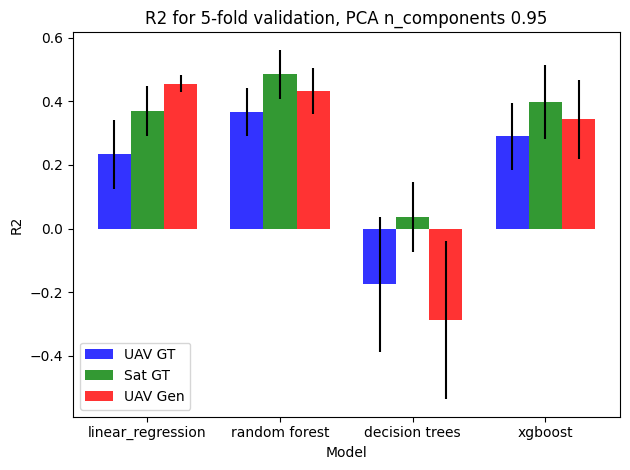

In [32]:
import matplotlib.pyplot as plt

# Define the data to plot
model_names = df["Model"]
uav_gt_means = [float(x.split()[0]) for x in df["UAV GT"]]
uav_gt_std = [float(x.split()[2].strip()) for x in df["UAV GT"]]
sat_gt_means = [float(x.split()[0]) for x in df["Sat GT"]]
sat_gt_std = [float(x.split()[2].strip()) for x in df["Sat GT"]]
uav_gen_means = [float(x.split()[0]) for x in df["UAV Gen"]]
uav_gen_std = [float(x.split()[2].strip()) for x in df["UAV Gen"]]

# Set up the plot
fig, ax = plt.subplots()
bar_width = 0.25
opacity = 0.8

# Plot the data
rects1 = ax.bar(range(len(model_names)), uav_gt_means, bar_width,
                alpha=opacity, color='b', label='UAV GT', yerr=uav_gt_std)
rects2 = ax.bar([x + bar_width for x in range(len(model_names))], sat_gt_means, bar_width,
                alpha=opacity, color='g', label='Sat GT', yerr=sat_gt_std)
rects3 = ax.bar([x + bar_width*2 for x in range(len(model_names))], uav_gen_means, bar_width,
                alpha=opacity, color='r', label='UAV Gen', yerr=uav_gen_std)

# Add labels, title, and legend
ax.set_xlabel('Model')
ax.set_ylabel('R2')
ax.set_title('R2 for 5-fold validation, PCA n_components 0.95')
ax.set_xticks([x + bar_width for x in range(len(model_names))])
ax.set_xticklabels(model_names)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# SAT GT
Linear Regression: RMSE: 22.741 +/- 1.439
Random Forest Regressor: RMSE: 21.912 +/- 0.971
Decision Tree Regressor: RMSE: 31.317 +/- 2.307
XGB Regressor: RMSE: 23.441 +/- 2.028
        

#         UAV GT
        
(672, 860647)
variance explained 95.03180620356702
Linear Regression: RMSE: 46.466 +/- 3.052
Random Forest Regressor: RMSE: 24.418 +/- 1.504
Decision Tree Regressor: RMSE: 35.511 +/- 2.023
XGB Regressor: RMSE: 25.862 +/- 1.331 
        
        

In [16]:
results_dft

,Dataset,Model,RMSE,MAE,R2
0,satin.csv,Linear Regression,24.404890,18.985305,0.370115
1,satin.csv,Random Forest Regressor,22.049494,17.317802,0.485319
2,satin.csv,Decision Tree Regressor,30.193316,23.632952,0.035504
3,satin.csv,XGB Regressor,23.779165,18.056139,0.398201
4,uavin.csv,Linear Regression,26.848958,21.147076,0.233015
5,uavin.csv,Random Forest Regressor,24.426824,19.373594,0.367022
6,uavin.csv,Decision Tree Regressor,33.111839,26.173333,-0.174711
7,uavin.csv,XGB Regressor,25.822343,20.421198,0.290145
8,uavgen.csv,Linear Regression,22.772082,17.868120,0.455787
9,uavgen.csv,Random Forest Regressor,23.208952,18.335450,0.433036


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
#Image To CSV

In [5]:
import os
from PIL import Image
import pandas as pd
import numpy as np
from tqdm import tqdm

for item in ["in",'gen']:
    # Set the path to the directory containing the images
    img_dir = "/work/mech-ai/ayanlade/sat_uav/su_multimae/output/"+item+"/uav"

    # Create an empty list to store the flattened arrays of each image
    img_data = []

    # Loop through each file in the directory
    for filename in tqdm(os.listdir(img_dir)):
        # Check if the file is an image
        if filename.endswith('.jpg') or filename.endswith('.png'):
            if "-223" in filename:
                continue
            # Open the image and convert it to RGB format
            img = Image.open(os.path.join(img_dir, filename)).convert('RGB')
            # Flatten the image array and convert it to a 1D numpy array
            flat_img = np.array(img).flatten()
            # Add the flattened array to the list along with the filename
            img_data.append([filename] + list(flat_img))

    # Create a pandas dataframe from the list of flattened arrays
    df = pd.DataFrame(img_data, columns=['filename'] + ['pixel_{}'.format(i) for i in range(len(img_data[0])-1)])
    print("now saving")
    df.to_csv('/work/mech-ai/ayanlade/sat_uav/su_multimae/downstream/uav'+item+'.csv', index=False)


100%|█| 9924/9924 [00:12<00:00, 768.9


now saving


100%|█| 9924/9924 [00:12<00:00, 809.8


now saving


In [6]:
dfp = pd.read_csv("satin.csv")

In [23]:
dfr = pd.read_csv("satgen.csv")

In [53]:
dfs = pd.read_csv("uavin.csv")

In [58]:
dft = pd.read_csv("uavgen.csv")

In [81]:
dfq = dfp.copy()

In [82]:
# entry = dfq['filename'][0]

# range_ = entry.replace(".TIF","")[13:].split("_")[0]
# pass_ = entry.replace(".TIF","")[13:].split("_")[1][:-6]
# gene_ = entry.replace(".TIF","")[8:12]

In [83]:
# print(entry,range_,pass_,gene_)

In [84]:
# define custom function to extract strings and perform lookup
def get_yield(entry):
#     range_ = entry.replace(".jpg","")[13:-2].split("_")[0]
#     pass_ = entry.replace(".jpg","")[13:-2].split("_")[1]
#     gene_ = entry.replace(".jpg","")[8:12]
    range_ = entry.replace(".TIF","")[13:].split("_")[0]
    pass_ = entry.replace(".TIF","")[13:].split("_")[1][:-6]
    gene_ = entry.replace(".TIF","")[8:12]

    yield_ = df2.loc[(df2['Range'] == int(range_)) & (df2['Pass'] == int(pass_)) & (df2['Exp'] == "LC_"+gene_), 'Yield (bu/ac)'].values
    if len(yield_) == 1:
        return yield_[0]
#         if entry[11] == "3":
#             N = "Low"
#         elif entry[11] == "2":
#             N = "Normal"
#         elif entry[11] == "1":
#             N = "High"
#         else:
#             N = None
#         return N
    else:
        return None
    
    
    

# assuming df is the pandas dataframe that you want to modify
# dfq = dfq.fillna(255)
# print(dfq)
x0 = dfq.iloc[:, :1]
x1 = dfq.iloc[:, 1:]

scaler = StandardScaler()
scaler.fit(x1)
x1_scaled = scaler.transform(x1)

pca_1000 = PCA(n_components=0.9,random_state=100)
pca_1000.fit(x1_scaled)
x1_pca_1000 =pca_1000.transform(x1_scaled)

print("variance explained", sum(pca_1000.explained_variance_ratio_*100))



variance explained 90.85541239106186


In [85]:

df_new =pd.DataFrame(x1_pca_1000, columns=["PCA"+str(x) for x in range(x1_pca_1000.shape[1])])

merged_df = pd.concat([x0, df_new], axis=1)

df1 = merged_df
df2 = pd.read_excel("YTMC_ Lisa_Plot_Coordinates_v4.xlsx", sheet_name="RawData (4-Row)")

# add new column to df1 using apply() and get_yield() function
# df1['Yield'] = df1['filename'].apply(get_yield)
df1['Yield'] = df1['filename'].apply(get_yield)



df1 = df1.dropna()

to_drop = ~df1['filename'].str.contains('-W3-')

# drop the selected rows using the df.drop() method
df1 = df1.drop(df1[to_drop].index)

df1.to_csv("yieldsmallsatin.csv",index=False)


In [86]:
df1 #.iloc[114,:]

,filename,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,Yield
1,Ames-W3-4232_22_21W3.jpg,-17.103038,77.159888,-56.348616,-71.802029,-2.472508,-2.791611,55.815092,-22.683689,-108.163055,-6.509496,112.562971,8.945993,-41.620111,-24.490455,42.589783,13.061582,0.912525,-49.950284,141.6
3,Ames-W3-4233_23_7W3.jpg,96.410980,71.588976,3.951700,-102.491676,-38.135745,163.876816,-4.263206,-83.107915,21.724664,-51.460325,49.389496,-2.945751,-34.727862,19.347319,-14.560920,-24.282984,-6.273638,-62.334688,154.3
8,Ames-W3-4232_15_17W3.jpg,66.477222,87.737816,-47.311560,-34.162504,-94.049761,-13.092487,-85.164972,-3.416818,29.879675,41.777033,22.624701,39.881700,-6.886855,26.622054,-9.059624,-3.921047,3.427450,17.991832,132.1
12,Ames-W3-4233_7_7W3.jpg,407.822272,83.601471,-61.580754,-26.292660,-42.657379,38.622949,86.718417,-60.422188,22.831421,46.719937,-26.226397,-76.906159,-40.235851,-28.767729,-51.401041,-61.885896,-32.747480,8.934588,131.2
16,Ames-W3-4233_6_4W3.jpg,470.513359,65.771043,-45.230801,77.902701,83.863105,90.691527,-156.468069,-119.708912,32.831020,-69.072114,-74.847656,-18.400489,-50.859080,-32.915745,-57.486646,-8.052345,-26.292872,44.291947,119.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,Ames-W3-4232_29_20W3.jpg,61.493005,114.580929,-121.158354,23.156596,30.012106,-51.412605,104.223032,-54.010130,-28.328975,-71.659330,-16.868168,-1.634789,27.134716,-41.787440,-44.027910,-29.494942,0.648097,4.907605,120.0
2006,Ames-W3-4231_2_3W3.jpg,70.231284,-2.890896,-45.314848,30.189640,18.267533,58.478247,42.671120,-7.726138,19.520451,-17.612638,33.310619,12.495991,-63.995621,-29.833753,-24.522730,11.665779,44.433546,-2.073291,111.2
2007,Ames-W3-4231_15_3W3.jpg,-222.235106,119.943845,-82.060795,-21.446411,-7.885606,11.708553,17.538007,41.296121,-35.084714,-20.999109,3.066733,21.246825,-3.999376,17.963804,23.060546,56.347548,9.277563,-3.681441,188.0
2008,Ames-W3-4231_8_5W3.jpg,293.794902,-0.300489,-16.013402,-26.098203,16.116002,-34.298234,30.214761,-49.401820,-36.649655,-24.531299,15.376216,28.665127,-5.551413,2.463157,6.210018,53.944943,-3.751897,-10.236076,105.4


In [ ]:
# Cluster genotypes – with different treatments 

In [ ]:
# Interaction b/w nitrogen levels and genotypes

In [ ]:
# Forecasting plant developments

In [ ]:
# Including weather data to make more informed decisions

In [ ]:
# Tasseling time 

In [ ]:
# Predict time of harvest (Moisture content may cause issues)

In [ ]:
# Suggestions from you. 